In [1]:
table1 = [1 201 592 61 9 -0.84
2 244 401 25 4 0.31
3 47 583 38 11 0.64
4 287 402 15 7 -0.27
5 203 495 21 5 -0.33
6 58 173 15 9 0.67
7 210 479 27 4 -0.02
8 202 504 14 4 -0.05
9 198 510 30 11 -0.84
10 158 416 16 7 -0.69
11 165 393 14 5 0.30
12 201 442 25 5 -0.46
13 157 317 52 5 -0.03
14 131 311 16 6 0.50
15 166 400 34 6 0.73
16 160 337 31 5 -0.52
17 186 423 42 9 0.90
18 125 334 26 8 0.40
19 218 533 16 6 -0.78
20 146 344 22 5 -0.56];

In [2]:
using PyPlot

INFO: Recompiling stale cache file /Users/jacques/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


# Exercise 1
Using the standard linear algebra method of this Section, fit
the straight line y = m x + b to the x, y, and σy values for data points 5
through 20 in Table 1 on page 6. That is, ignore the first four data points,
and also ignore the columns for σx and ρxy. Make a plot showing the points,
their uncertainties, and the best-fit line. Your plot should end up looking
like Figure 1. What is the standard uncertainty variance σ2 m on the slope of the line?

In [3]:
x = table1[5:end, 2]
y = table1[5:end, 3]
σ = table1[5:end, 4];
C = Diagonal(σ .^ 2);
A = vcat([ones(size(x)) x]);

In [4]:
D = A' * inv(C) * A
params = inv(D) * A' * inv(C) * y

2-element Array{Float64,1}:
 34.0477 
  2.23992

In [5]:
sqrt.(diag(inv(D)))

2-element Array{Float64,1}:
 18.2462 
  0.10778

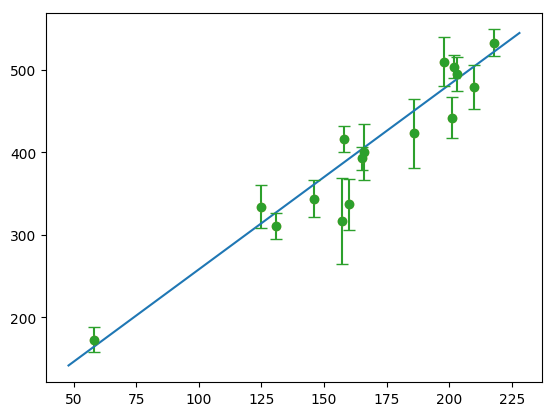

In [6]:
t = linspace(minimum(x)-10, maximum(x)+10, 200)
plot(t, t*params[2] + params[1])
plot(x, y, "o", alpha=0.5)
errorbar(x, y, σ, fmt="o", capsize=4);

# Exercise 2

Repeat Exercise 1 but for all the data points in Table 1 on
page 6. Your plot should end up looking like Figure 2. What is the standard
uncertainty variance σ
2
m on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you
have included beyond those used in Exercise 1?

In [7]:
x = table1[:, 2]
y = table1[:, 3]
σ = table1[:, 4];
C = Diagonal(σ .^ 2);
A = vcat([ones(size(x)) x]);

In [8]:
D = A' * inv(C) * A
params = inv(D) * A' * inv(C) * y

2-element Array{Float64,1}:
 213.273  
   1.07675

In [9]:
sqrt.(diag(inv(D)))

2-element Array{Float64,1}:
 14.394    
  0.0774068

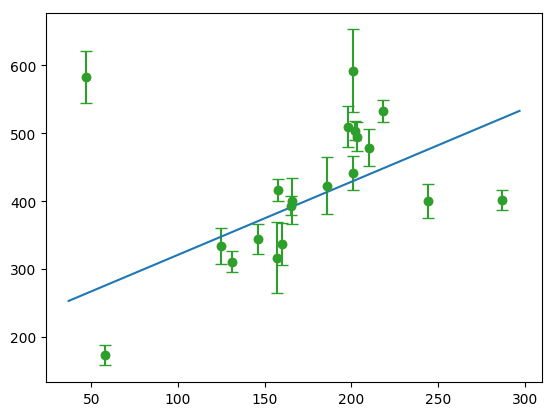

In [10]:
t = linspace(minimum(x)-10, maximum(x)+10, 200)
plot(t, t*params[2] + params[1])
plot(x, y, "o", alpha=0.5)
errorbar(x, y, σ, fmt="o", capsize=4);

# Exercise 3:
Generalize the method of this Section to fit a general quadratic
(second order) relationship. Add another column to matrix A containing the
values x
2
i
, and another element to vector X (call it q). Then re-do Exercise 1
but fitting for and plotting the best quadratic relationship
g(x) = q x2 + m x + b . 

In [11]:
x = table1[5:end, 2]
y = table1[5:end, 3]
σ = table1[5:end, 4];
C = Diagonal(σ .^ 2);
A = vcat([ones(size(x)) x x.^2]);

In [12]:
D = A' * inv(C) * A
params = inv(D) * A' * inv(C) * y

3-element Array{Float64,1}:
 72.8946    
  1.59605   
  0.00229889

In [13]:
sqrt.(diag(inv(D)))

3-element Array{Float64,1}:
 38.9116    
  0.579748  
  0.00203386

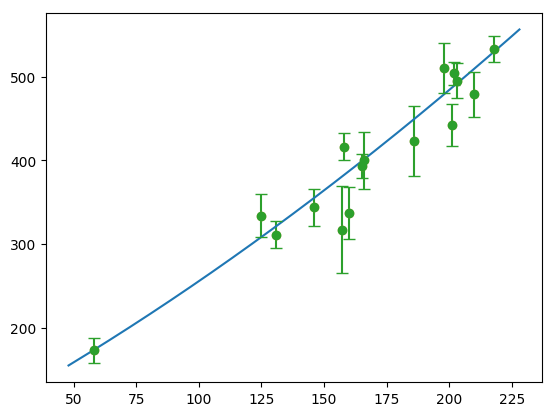

In [14]:
t = linspace(minimum(x)-10, maximum(x)+10, 200)
plot(t, t.^2 * params[3] + t*params[2] + params[1])
plot(x, y, "o", alpha=0.5)
errorbar(x, y, σ, fmt="o", capsize=4);

# Exercise 4:
Imagine a set of N measurements ti, with uncertainty variances
σ 2 ti, all of the same (unknown) quantity T. Assuming the generative
model that each ti differs from T by a Gaussian-distributed offset, taken from
a Gaussian with zero mean and variance σ
2 ti, write down an expression for
the log likelihood ln L for the data given the model parameter T. Take a
derivative and show that the maximum likelihood value for T is the usual
weighted mean.

$$
\begin{aligned}
p(t_i) &= \frac{1}{\sqrt{2\pi \sigma^2_{ti}}}
\exp{-\frac{(t_i - T)^2}{2\sigma^2_{ti}}} \\
L &= \prod_1^N p(t_i) \\
\log L &= K + \sum_1^N -\frac{(t_i - T)^2}{2\sigma^2_{ti}} \\
d/dT \log L &= \sum_1^N \frac{-1}{{2\sigma^2_{ti}} } d/dT (t_i - T)^2 \\
d/dT \log L &= \sum_1^N \frac{1}{{\sigma^2_{ti}} } (t_i - T) \\
0 &= \sum_1^N \frac{1}{{\sigma^2_{ti}} } (t_i - T) \\
NT \sum_1^N \frac{1}{\sigma^2_{ti}} &= \sum_1^N \frac{t_i}{{\sigma^2_{ti}} } \\
T &= \frac{1}{C} \sum_1^N \frac{t_i}{{\sigma^2_{ti}} } \\
C &= N \sum_1^N \frac{1}{\sigma^2_{ti}}  
\end{aligned}
$$

# Exercise 5:
Take the matrix formulation for χ
2 given in equation (7) and
take derivatives to show that the minimum is at the matrix location given in
equation (5).

$$
\begin{aligned}
\chi^2 &= (Y - AX)' C^{-1} (Y - AX) \\
d/dX \chi^2 &= -2A'C^{-1}(Y - AX) \\
0 &= -2A'C^{-1}(Y - AX) \\
-2A'C^{-1}AX &= -2A'C^{-1}Y \\
A'C^{-1}AX &= A'C^{-1}Y \\
X &= (A'C^{-1}A)^{-1} A'C^{-1}Y \\
\end{aligned}
$$